In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

#폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})


과제 1: Iris 다른 특성 조합
Sepal Width와 Petal Width의 관계 분석

→ 선형 회귀 모델 만들고 R² 비교하기

In [29]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
iris = load_iris().data


In [28]:
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.shape

(150, 4)

In [32]:
iris[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
# reshpae (-1) -> 그자체 크기를 말하는거나 같음 (-1,1) 하면 1차원->2차원
X = iris[:,1].reshape(-1,1) # sepal_width

In [33]:
X.shape

(150, 1)

In [34]:
X

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.6],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3],
       [3.2],
       [3.2],
       [3.1],
       [2.3],
       [2.8],
       [2.8],
       [3.3],
       [2.4],
       [2.9],
       [2.7],
       [2. ],
       [3. ],
       [2.2],
       [2.9],
       [2.9],
       [3.1],
       [3. ],
       [2.7],
       [2.2],
       [2.5],
       [3.2],
      

In [35]:
X.flatten()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [36]:
y = iris[:,3]     # 종속변수

In [37]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

<Axes: >

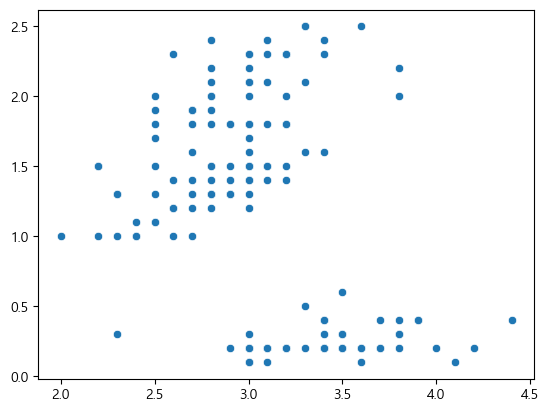

In [38]:
sns.scatterplot(x=X.flatten() ,y=y)

In [40]:
# Train: 80%, Test: 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train 세트: {len(X_train)}개")
print(f"Test 세트: {len(X_test)}개")

Train 세트: 120개
Test 세트: 30개


In [52]:
# 선형 회귀 모델 생성 y = a₁x₁ + a₂x₂ + ... + b 형태
model = LinearRegression()

# 학습! 실제로 데이터를 보고 a 와 b 값을 찾는 단계
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
# w와 b 확인
w = model.coef_[0] # 기울기
b = model.intercept_ # 절편

print(f" 학습 완료!")
print(f"가중치 w (기울기): {w:.3f}")
print(f"편향 b (절편): {b:.3f}")
print(f"찾은 식: y = {w:.3f}x + {b:.3f}")

 학습 완료!
가중치 w (기울기): -0.619
편향 b (절편): 3.078
찾은 식: y = -0.619x + 3.078


In [ ]:
#예측 
y_pred = model.predict(X_test)

In [59]:
# MSE (Mean Squared Error) → 오차 제곱의 평균 (작을수록 좋음)
mse = mean_squared_error(y_test, y_pred) 

# R² (결정계수) → 모델이 데이터를 얼마나 설명하는가 (1에 가까울수록 좋음 0 또는 음수는 거의 관계없다.or 틀린방향 예측)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.5617835897948079
R2 Score: 0.11621382856661178


| 구분        | MSE          | R² Score    |
| --------- | ------------ | ----------- |
| **의미**    | 오차 크기 자체     | 모델의 설명력 비율  |
| **좋은 방향** | 0에 가까울수록 좋음  | 1에 가까울수록 좋음 |
| **단위**    | y의 제곱 단위     | 단위 없음 (비율형) |
| **직관성**   | 오차 크기 감지에 유리 | 모델 비교에 유리   |


In [ ]:
'''
 R²: 0.11621382856661178

Sepal Width와 Petal Width 간의 선형 관계를 분석한 결과,
R² 값이 0.116으로 매우 낮게 나타나 두 특성 간에는 뚜렷한 상관관계가 없는 것으로 판단된다.

'''

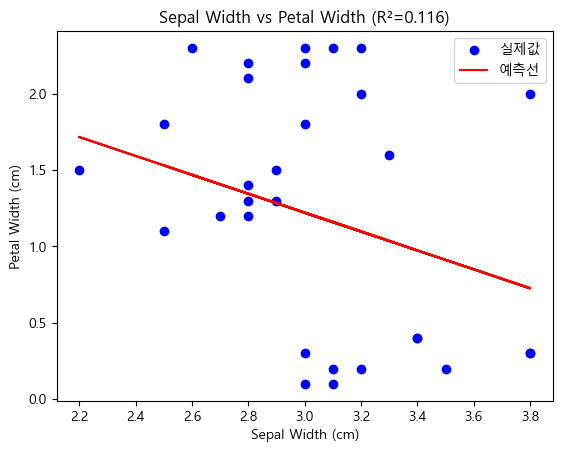

In [55]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='실제값')
plt.plot(X_test, y_pred, color='red', label='예측선')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f'Sepal Width vs Petal Width (R²={r2:.3f})')
plt.legend()
plt.show()


In [43]:
y_pred = model.predict(X_test)

# MSE (Mean Squared Error) → 오차 제곱의 평균 (작을수록 좋음)
mse = mean_squared_error(y_test, y_pred) 

# R² (결정계수) → 모델이 데이터를 얼마나 설명하는가 (1에 가까울수록 좋음)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 0.5617835897948079
R2 Score: 0.11621382856661178


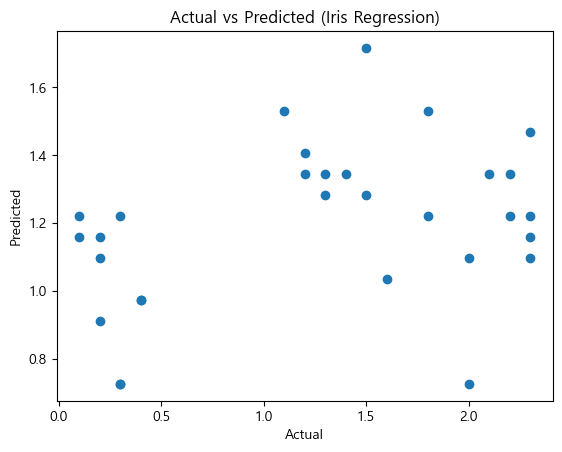

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Iris Regression)")
plt.show()


과제 2: 당뇨병 데이터 특성 선택
BMI 예측에 가장 좋은 특성 조합 찾기

→ 2개, 3개, 5개 특성 조합 비교
r2스코어 가장 높은것찾기

In [61]:
df = pd.read_csv('train.csv')

In [62]:
df_t = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,pd.NA)
df_t.isnull().sum()

Glucose            4
BloodPressure     30
SkinThickness    195
Insulin          318
BMI                7
Age                0
dtype: int64

In [ ]:
# 결측치 제거
df_t.dropna(inplace=True)
df_t.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
dtype: int64

In [66]:
df_t.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.078956
Age,0.342942,0.301791,0.182784,0.196610,0.078956,1.000000


In [ ]:
# BMI를 제외한 나머지 변수들 → 입력값
X = df.drop("BMI", axis=1) 

# 예측 대상(BMI)
y = df["BMI"]

In [ ]:
# 사용할 특성 조합 정의 (조합별로 R² 비교할 예정)

feature_sets = {
    "2 features": ["Glucose", "Age"],
    "3 features": ["Glucose", "Age", "Insulin"],
    "5 features": ["Glucose", "Age", "Insulin", "BloodPressure", "SkinThickness"]
}


In [74]:
results2 = {}        ## R² 결과 저장
coefficients = {}    ## 회귀계수 저장

# feature_sets의 key, value 쌍 반복
for name, features in feature_sets.items():
    X_train2, X_test2, y_train2, y_test2 = train_test_split(
        # 80%는 학습용, 20%는 테스트용
        df[features], y, test_size=0.2, random_state=42
    )

    model2 = LinearRegression()                 # 선형회귀 모델 생성
    model2.fit(X_train2, y_train2)              # 모델 학습
    y_pred2 = model2.predict(X_test2)           # 테스트 데이터로 예측

    # 예측 성능 평가 저장 (R² 계산)
    r2_2 = r2_score(y_test2, y_pred2)           
    results2[name] = r2_2

    # 회귀계수 저장 (특성 이름과 함께)
    coef_df = pd.DataFrame({
        "Feature": features,
        "Coefficient": model2.coef_
    })
    coefficients[name] = coef_df



In [75]:
# R² 결과 출력
for name, score in results2.items():
    print(f"{name} R² = {score:.3f}")


2 features R² = 0.037
3 features R² = 0.066
5 features R² = 0.290


2 features R² = 0.037 -> 거의 관계 없음
3 features R² = 0.066 -> 아주 약한 관계
5 features R² = 0.290 -> 3가지보다는 강하지만 역시 약한 관계

In [76]:
# 회귀계수 출력
print("\n=== 각 조합별 회귀계수 ===")
for name, coef_df in coefficients.items():
    print(f"\n{name}")
    print(coef_df)


=== 각 조합별 회귀계수 ===

2 features
   Feature  Coefficient
0  Glucose     0.056018
1      Age    -0.032485

3 features
   Feature  Coefficient
0  Glucose     0.046345
1      Age    -0.023847
2  Insulin     0.006829

5 features
         Feature  Coefficient
0        Glucose     0.051489
1            Age    -0.020678
2        Insulin    -0.003578
3  BloodPressure     0.059985
4  SkinThickness     0.149327


=== 각 조합별 회귀계수 ===

2 features
   Feature  Coefficient
0  Glucose     0.056018         Glucose가 높을수록 BMI가 증가
1      Age    -0.032485         Age는 약간 감소 경향

3 features
   Feature  Coefficient
0  Glucose     0.046345         양의 영향
1      Age    -0.023847
2  Insulin     0.006829         양의 영향

5 features 
         Feature  Coefficient
0        Glucose     0.051489
1            Age    -0.020678
2        Insulin    -0.003578
3  BloodPressure     0.059985
4  SkinThickness     0.149327    SkinThickness(피하지방 두께)가 BMI에 가장 강한 양의 상관


In [ ]:
'''
특성 조합을 늘릴수록 R²가 높아져 모델 설명력이 향상되었다.
하지만 전체적으로 R²이 낮아, 선형 모델만으로는 BMI를 충분히 예측하기 어렵다.
다만 회귀계수를 통해 보면 SkinThickness, Glucose, BloodPressure 등이
BMI에 양의 영향을 미치는 주요 요인으로 확인되었다.
'''

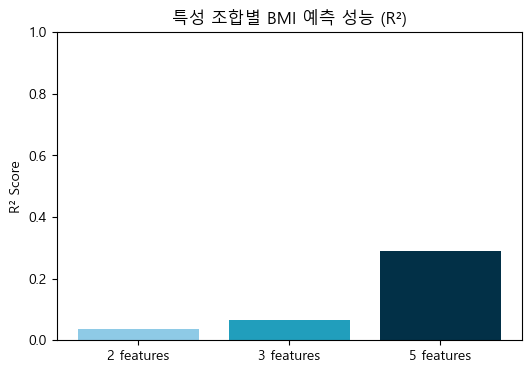

In [ ]:
# 시각화 (막대그래프로 성능 비교)
import matplotlib.pyplot as plt

# 결과를 막대그래프로 시각화
plt.figure(figsize=(6,4))
plt.bar(results2.keys(), results2.values(), color=['#8ecae6', '#219ebc', '#023047'])
plt.title('특성 조합별 BMI 예측 성능 (R²)')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² 범위 맞춰서 보기 좋게
plt.show()


In [ ]:
# 라이브러리 불러오기
import pandas as pd
from itertools import combinations                  ## 조합 만들기용
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1️⃣ 데이터 준비
## (train.csv 불러온 상태라고 가정)
## 타깃값은 BMI, 나머지 열들이 입력변수
feature_pool = ['Pregnancies', 'Glucose', 'BloodPressure',
                'SkinThickness', 'Insulin',
                'DiabetesPedigreeFunction', 'Age']

y = df['BMI']    ## 예측 대상(BMI)
# df는 train.csv를 pd.read_csv()로 미리 불러온 상태여야 함


# 2️⃣ 보조 함수 정의
## (1) 단순 홀드아웃 방식으로 R² 계산
def evaluate_once(features):
    """
    주어진 feature 조합(features)에 대해
    8:2 비율로 데이터를 나누고 선형회귀 모델을 학습한 후,
    테스트 데이터에서 R²를 계산해 반환
    """
    X = df[list(features)]    # 입력값 X 설정
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LinearRegression()  # 선형회귀 모델 생성
    model.fit(X_train, y_train) # 학습 수행
    r2 = model.score(X_test, y_test)  # R² 계산
    return r2, model.coef_             # (R², 회귀계수) 반환


## (2) 교차검증(cross-validation)으로 평균 R² 계산
def evaluate_cv(features, n_splits=5):
    """
    K-Fold 교차검증을 통해 R² 평균과 표준편차 계산
    - 데이터를 여러 번 나눠 평균을 구하기 때문에 더 안정적인 평가 가능
    """
    X = df[list(features)]
    model = LinearRegression()
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')  # 교차검증 R²
    return scores.mean(), scores.std()  # 평균, 표준편차 반환


# 3️⃣ 가능한 모든 조합(2개, 3개, 5개)을 평가
rows = []  # 결과를 담을 리스트

for k in [2, 3, 5]:                            # 특성 개수별 반복
    for combo in combinations(feature_pool, k): # 가능한 모든 조합 생성
        r2_mean, r2_std = evaluate_cv(combo)    # 교차검증 평가
        rows.append({
            "k": k,                             # 특성 개수
            "features": combo,                  # 조합된 특성 이름
            "R2_mean": r2_mean,                 # 평균 R²
            "R2_std": r2_std                    # 표준편차
        })

# 4️⃣ 결과를 DataFrame으로 정리하고 R² 높은 순으로 정렬
results_df = pd.DataFrame(rows).sort_values(["k", "R2_mean"], ascending=[True, False])

# 5️⃣ 각 k별 상위 5개 조합 출력
for k in [2, 3, 5]:
    print(f"\n=== Top 5 조합 (특성 {k}개) ===")
    display(results_df[results_df["k"] == k].head(5))

# 6️⃣ 각 k에서 1등한 조합의 회귀계수 확인
best_coefs = {}
for k in [2, 3, 5]:
    top = results_df[results_df["k"] == k].iloc[0]     # R² 1등 조합 선택
    r2_holdout, coefs = evaluate_once(top["features"]) # 홀드아웃 R² 계산
    best_coefs[k] = pd.DataFrame({
        "Feature": top["features"],     # 특성 이름
        "Coefficient": coefs            # 해당 특성의 회귀계수
    }).sort_values("Coefficient", ascending=False)

    print(f"\n--- k={k}개 특성 ---")
    print(f"Best combo: {top['features']}")
    print(f"CV R² 평균: {top['R2_mean']:.3f} (±{top['R2_std']:.3f}) | Hold-out R²: {r2_holdout:.3f}")
    print(best_coefs[k])



=== Top-5 (k=2) ===


,k,features,R2_mean,R2_std
7,2,"(Glucose, SkinThickness)",0.170683,0.054819
11,2,"(BloodPressure, SkinThickness)",0.154371,0.089229
2,2,"(Pregnancies, SkinThickness)",0.136099,0.059790
17,2,"(SkinThickness, Age)",0.135154,0.064737
15,2,"(SkinThickness, Insulin)",0.128598,0.062517



=== Top-5 (k=3) ===


,k,features,R2_mean,R2_std
36,3,"(Glucose, BloodPressure, SkinThickness)",0.185836,0.082726
22,3,"(Pregnancies, Glucose, SkinThickness)",0.173208,0.057375
42,3,"(Glucose, SkinThickness, Age)",0.168514,0.055930
40,3,"(Glucose, SkinThickness, Insulin)",0.166328,0.050699
41,3,"(Glucose, SkinThickness, DiabetesPedigreeFunct...",0.165583,0.053085



=== Top-5 (k=5) ===


,k,features,R2_mean,R2_std
58,5,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.182893,0.081792
57,5,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.182168,0.080798
56,5,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.181294,0.081307
73,5,"(Glucose, BloodPressure, SkinThickness, Diabet...",0.178358,0.079658
71,5,"(Glucose, BloodPressure, SkinThickness, Insuli...",0.178004,0.078215



--- k=2 Best combo: ('Glucose', 'SkinThickness') | CV R²=0.171±0.055 | Hold-out R²=0.252
         Feature  Coefficient
1  SkinThickness     0.153944
0        Glucose     0.049248

--- k=3 Best combo: ('Glucose', 'BloodPressure', 'SkinThickness') | CV R²=0.186±0.083 | Hold-out R²=0.302
         Feature  Coefficient
2  SkinThickness     0.140076
1  BloodPressure     0.057996
0        Glucose     0.045229

--- k=5 Best combo: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age') | CV R²=0.183±0.082 | Hold-out R²=0.295
         Feature  Coefficient
3  SkinThickness     0.137619
0    Pregnancies     0.111590
2  BloodPressure     0.059453
1        Glucose     0.047030
4            Age    -0.034523


In [79]:
# ============================================================
# 당뇨병 데이터(df)에서 BMI 예측을 위한 '간단 조합 탐색'
# - 우리가 배운 기본 흐름만 사용:
#   train_test_split → LinearRegression.fit → predict → r2_score
# - 가능한 모든 2/3/5개 조합을 시도하고, 각 k에서 R² 최고 조합 1개만 보고
# ============================================================

import pandas as pd
from itertools import combinations                           # 여러 특성의 모든 조합을 생성
from sklearn.model_selection import train_test_split         # 학습/테스트 분할
from sklearn.linear_model import LinearRegression            # 선형 회귀 모델
from sklearn.metrics import r2_score                         # R²(결정계수) 성능 지표

# 0) 준비: df는 이미 pd.read_csv("train.csv")로 로드되어 있다고 가정
#    타깃(y)은 BMI, 입력 X는 BMI를 제외한 나머지 열들
y = df["BMI"]

# 1) 후보 특성 풀 정의 (BMI 제외) — 데이터셋 열 이름에 맞게 필요 시 수정
feature_pool = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin",
    "DiabetesPedigreeFunction", "Age"
]

def eval_once(features):
    """
    주어진 특성 조합(features)로 '한 번' 학습/평가하는 함수
    - 우리가 배운 방식 그대로: 홀드아웃 8:2 분할
    - 절차:
        1) X 구성 → 8:2 분할
        2) 선형회귀 학습 (fit)
        3) 예측 (predict)
        4) R² 계산 (r2_score)
    - 반환: (R² 점수, 회귀계수 배열)
    """
    # 입력 X를 현재 조합의 열들로 구성
    X = df[list(features)]

    # 8:2로 분할(재현성 위해 random_state 고정)
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 선형회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_tr, y_tr)

    # 테스트 세트 예측
    y_hat = model.predict(X_te)

    # 성능 계산(R²이 클수록 좋음)
    r2 = r2_score(y_te, y_hat)

    # 회귀계수: 각 특성(feature)에 곱해지는 가중치(영향력, 양수/음수 방향)
    return r2, model.coef_

# 2) 2·3·5개 조합을 모두 평가하여, 각 k에서 '최고 R² 조합'만 선택
best = {  # 각 k에 대해 최고 성능의 조합/점수/계수를 저장
    2: {"features": None, "r2": float("-inf"), "coef": None},
    3: {"features": None, "r2": float("-inf"), "coef": None},
    5: {"features": None, "r2": float("-inf"), "coef": None},
}

# 모든 조합을 순회하며 평가
for k in [2, 3, 5]:
    for combo in combinations(feature_pool, k):    # 예: ('Glucose','Age'), ('Glucose','Insulin'), ...
        r2, coef = eval_once(combo)                # 한 번 학습 → 예측 → R² 계산
        if r2 > best[k]["r2"]:                     # 현재까지 최고 R²보다 좋으면 교체
            best[k]["features"] = combo
            best[k]["r2"] = r2
            best[k]["coef"] = coef

# 3) 결과 출력: 각 k에서 베스트 조합과 R², 그리고 각 특성의 회귀계수
for k in [2, 3, 5]:
    print(f"\n[k={k}] Best combo: {best[k]['features']} | R²={best[k]['r2']:.3f}")
    print("Coefficients (특성 영향력: +이면 BMI 증가 방향, -이면 감소 방향):")
    for f, c in zip(best[k]["features"], best[k]["coef"]):
        print(f"  {f:>24s}: {c:+.4f}")



[k=2] Best combo: ('BloodPressure', 'SkinThickness') | R²=0.292
Coefficients (특성 영향력: +이면 BMI 증가 방향, -이면 감소 방향):
             BloodPressure: +0.0665
             SkinThickness: +0.1423

[k=3] Best combo: ('Glucose', 'BloodPressure', 'SkinThickness') | R²=0.302
Coefficients (특성 영향력: +이면 BMI 증가 방향, -이면 감소 방향):
                   Glucose: +0.0452
             BloodPressure: +0.0580
             SkinThickness: +0.1401

[k=5] Best combo: ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction') | R²=0.303
Coefficients (특성 영향력: +이면 BMI 증가 방향, -이면 감소 방향):
               Pregnancies: +0.0566
                   Glucose: +0.0447
             BloodPressure: +0.0563
             SkinThickness: +0.1418
  DiabetesPedigreeFunction: -0.0669
